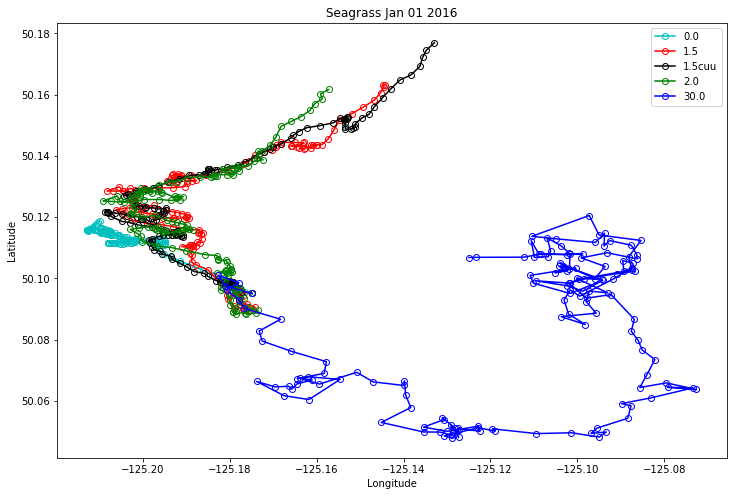

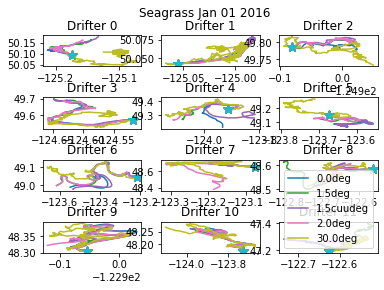

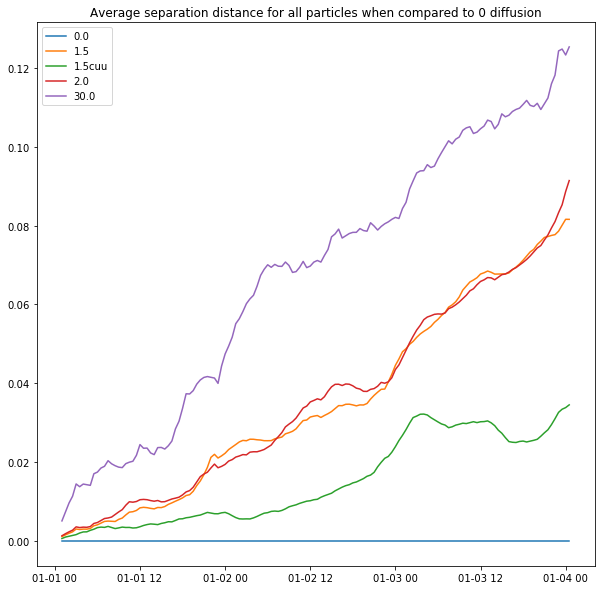

In [1]:
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt

# Compare particle tracks over 3 days with different current_uncertainty values.

# base matplotlib approach
# code from BMM
# https://nbviewer.jupyter.org/urls/bitbucket.org/salishsea/analysis-ben/raw/tip/notebooks/OpenDrift/OceanParcels_workflow.ipynb

# Comparison of first particle
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title(f'Seagrass Jan 01 2016')
for diff, color in zip([0.0, 1.5, '1.5cuu', 2.0, 30.0], ['c', 'r', 'k', 'g', 'b']):
    diff_str = ''.join(str(diff).split('.'))
    ds = xr.open_dataset(r'C:\Users\jcristia\Documents\GIS\MSc_Projects\Hakai\scripts_dev_scratch\sensitivity_testing\diffusion\working_simulation\outputs\seagrass12particles_' + diff_str + '.nc')
    ax.plot(ds.lon[0, :], ds.lat[0, :], 'o-', color=color, fillstyle='none', label=f'{diff}',)
ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()
fig.savefig(r'C:\Users\jcristia\Documents\GIS\MSc_Projects\Hakai\scripts_dev_scratch\sensitivity_testing\diffusion\OpenDrift_interpolation_1particle.pdf', bbox_inches='tight')

# Comparison of all 12 particles
fig, axs = plt.subplots(4,3)
axs = axs.reshape(12)
fig.subplots_adjust(hspace=1)
fig.suptitle('Seagrass Jan 01 2016')
for ax, drifter in zip(axs, range(12)):
    ax.set_title(f'Drifter {drifter}')
    for diff, color in zip([0.0, 1.5, '1.5cuu', 2.0, 30.0], ['c', 'r', 'k', 'g', 'b']):
        diff_str = ''.join(str(diff).split('.'))
        ds = xr.open_dataset(r'C:\Users\jcristia\Documents\GIS\MSc_Projects\Hakai\scripts_dev_scratch\sensitivity_testing\diffusion\working_simulation\outputs\seagrass12particles_' + diff_str + '.nc')
        ax.plot(
            ds.lon[drifter, :], ds.lat[drifter, :], label=f'{diff}deg')
        ax.plot(ds.lon[drifter, 0].item(), ds.lat[drifter, 0].item(), marker='*', ms=10)
ax.legend()
plt.show()
fig.savefig(r'C:\Users\jcristia\Documents\GIS\MSc_Projects\Hakai\scripts_dev_scratch\sensitivity_testing\diffusion\OpenDrift_interpolation_12particles.pdf', bbox_inches='tight')


#############################################

# compare particle difference to a baseline of 0
# code also from BMM
# note: his code had an error in it when it goes to plot and indexes time
# also, his code may not match up with the plots displayed. Where he normalizes it (second time he calculates d), I don't think he is actually doing this.
# Also, refer to Nancy S presentation I got from Hauke. She calculates the Molcard skill score which I think is where the normalization comes from. This considers how far apart particles are, but also how far they are from their origin.

dts = ['0.0', '1.5', '1.5cuu', '2.0', '30.0']
fig, ax = plt.subplots(figsize=(10, 10))
ds = xr.open_dataset(r'C:\Users\jcristia\Documents\GIS\MSc_Projects\Hakai\scripts_dev_scratch\sensitivity_testing\diffusion\working_simulation\outputs\seagrass12particles_00.nc')
time, lon, lat = [ds[key] for key in ['time', 'lon', 'lat']]

for dt in dts:
    diff_str = ''.join(str(dt).split('.'))
    ds = xr.open_dataset(r'C:\Users\jcristia\Documents\GIS\MSc_Projects\Hakai\scripts_dev_scratch\sensitivity_testing\diffusion\working_simulation\outputs\seagrass12particles_' + diff_str + '.nc')
    d = np.sqrt((ds.lon[:, 1:] - lon[:, 1:])**2 + (ds.lat[:, 1:] - lat[:, 1:])**2)
    #d = d / np.sqrt((ds.lon[:, 1:] - ds.lon[:, 0])**2 + (ds.lat[:, 1:] - ds.lat[:, 0])**2)
    ax.plot(time[1:], d.mean(axis=0), label=f'{dt}')
ax.legend()
ax.set_title(f'Average separation distance for all particles when compared to 0 diffusion')
plt.show()
fig.savefig(r'C:\Users\jcristia\Documents\GIS\MSc_Projects\Hakai\scripts_dev_scratch\sensitivity_testing\diffusion\OpenDrift_interpolation_12particles_distancediff.pdf', bbox_inches='tight')


#############################################